# Project: No-Show Appointments in Brazilian Hospitals

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

Main question for this investigation: 
>"What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?"
##### Further detailed questions:
1. Does gender affect the attendence to the appointments?
2. Is there a correlation between receiving an SMS and the attendence of appointments?
3. Is there a correlation between having a scholarship and the attendence of appointments?
4. Is there a correlation between age and the attendence of appointments?
5. Does the day of the appointment play a role in attending to the appointment?


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, you we will check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

#### Loading tools for this investigation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading data

In [2]:
df = pd.read_csv("/Users/ricostass/Desktop/Udacity/Jupyter_Notebooks/Final_project_no_show_med_app_brazil/noshowappointments-kagglev2-may-2016.csv")

#### First glance at the data

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Quick-Check: 
1. Size of the Dataset in terms of values total, columns and row
2. Missing Data (Non-Null Count) that needs to be filled
3. First look at Datatypes and possible corrections

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Checking datatype "object"

In [5]:
type(df["ScheduledDay"][0]) #change to Datetime

str

In [6]:
type(df["AppointmentDay"][0]) #change to Datetime

str

#### Quickcheck at statistical Data and outliers

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Checking for unique values

In [8]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

#### Checking for duplicates

In [9]:
df.duplicated().sum()

0

#### Looking at unique values available

In [10]:
print("Gender=> {}".format(df.Gender.unique()))
print("Age=> {}".format(np.sort(df.Age.unique())))
print("Scholarship=> {}".format(df.Scholarship.unique()))
print("Hipertension=> {}".format(df.Hipertension.unique()))
print("Diabetes=> {}".format(df.Diabetes.unique()))
print("Alcholism=> {}".format(df.Alcoholism.unique()))
print("Handcap=> {}".format(df.Handcap.unique()))
print("SMS_received=> {}".format(df.SMS_received.unique()))

Gender=> ['F' 'M']
Age=> [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 102 115]
Scholarship=> [0 1]
Hipertension=> [1 0]
Diabetes=> [0 1]
Alcholism=> [0 1]
Handcap=> [0 1 2 3 4]
SMS_received=> [0 1]


In [11]:
print("Neighboourhood=> {}".format(np.sort(df.Neighbourhood.unique())))

Neighboourhood=> ['AEROPORTO' 'ANDORINHAS' 'ANTÔNIO HONÓRIO' 'ARIOVALDO FAVALESSA'
 'BARRO VERMELHO' 'BELA VISTA' 'BENTO FERREIRA' 'BOA VISTA' 'BONFIM'
 'CARATOÍRA' 'CENTRO' 'COMDUSA' 'CONQUISTA' 'CONSOLAÇÃO' 'CRUZAMENTO'
 'DA PENHA' 'DE LOURDES' 'DO CABRAL' 'DO MOSCOSO' 'DO QUADRO'
 'ENSEADA DO SUÁ' 'ESTRELINHA' 'FONTE GRANDE' 'FORTE SÃO JOÃO' 'FRADINHOS'
 'GOIABEIRAS' 'GRANDE VITÓRIA' 'GURIGICA' 'HORTO' 'ILHA DAS CAIEIRAS'
 'ILHA DE SANTA MARIA' 'ILHA DO BOI' 'ILHA DO FRADE' 'ILHA DO PRÍNCIPE'
 'ILHAS OCEÂNICAS DE TRINDADE' 'INHANGUETÁ' 'ITARARÉ' 'JABOUR'
 'JARDIM CAMBURI' 'JARDIM DA PENHA' 'JESUS DE NAZARETH' 'JOANA D´ARC'
 'JUCUTUQUARA' 'MARIA ORTIZ' 'MARUÍPE' 'MATA DA PRAIA' 'MONTE BELO'
 'MORADA DE CAMBURI' 'MÁRIO CYPRESTE' 'NAZARETH' 'NOVA PALESTINA'
 'PARQUE INDUSTRIAL' 'PARQUE MOSCOSO' 'PIEDADE' 'PONTAL DE CAMBURI'
 'PRAIA DO CANTO' 'PRAIA DO SUÁ' 'REDENÇÃO' 'REPÚBLICA' 'RESISTÊNCIA'
 'ROMÃO' 'SANTA CECÍLIA' 'SANTA CLARA' 'SANTA HELENA' 'SANTA LUÍZA'
 'SANTA LÚCIA' 'SANTA MART

### Data Cleaning (Replace this with more specific notes!)

NeigbourhoodBelow we will correct some of the inconsistencies in the data:

1. PatientId is a Float and not an Integer. So, we will convert it into int64.
2. Data Type of ScheduledDay and AppointmentDay will be changed to DateTime.
3. Typo's in the Column names will be corrected
4. As the AppointmentDay has 00:00:00 in it's TimeStamp, we will ignore it.
5. Delete Row with Age = -1 (seems like a mistake without further explanation)

In [12]:
df["PatientId"] = df["PatientId"].astype("int64")
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])
df = df.rename(columns={"PatientId":"PatientID", "Hipertension":"Hypertension","Handcap": "Handicap", "SMS_received": "SMSReceived", "No-show": "NoShow"})

#### Check if changes worked out

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientID       110527 non-null  int64              
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMSReceived     110527 non-null  int64              
 13  NoShow        

#### Drop Age under 0 & AppointmentID
We drop the AppointmentID because it is a unique value which does not provied us any value in our analysis.

In [14]:
df = df[df.Age >= 0]
df = df.drop('AppointmentID', 1)

#### Check if changes were succesful

In [15]:
df.head()

,PatientID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,29872499824296,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Basic Exploration

Here we just want to get a feel for the data looking at some histograms and count bar-charts.

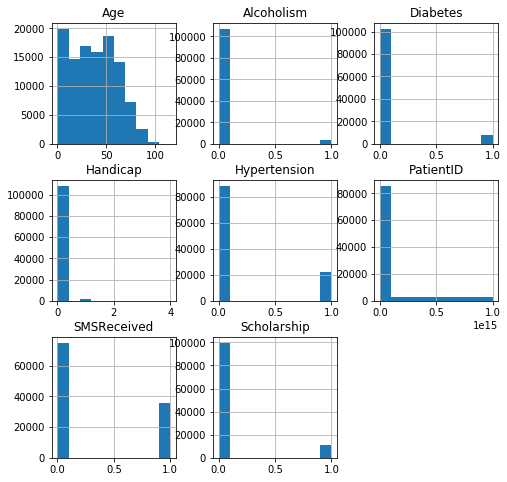

In [16]:
df.hist(figsize=(8, 8));

The histograms tell us, that most patients in this dataset have no diabetes, handicap, hypertension and scholarship as well as received no SMS prior to their appointment.
Age is a bit more interesting, as we are right screwed which means we got more really young patients than really old ones.

In the next few bar charts, we are just having a better look at how big the differences are, as well as stating which value means what.

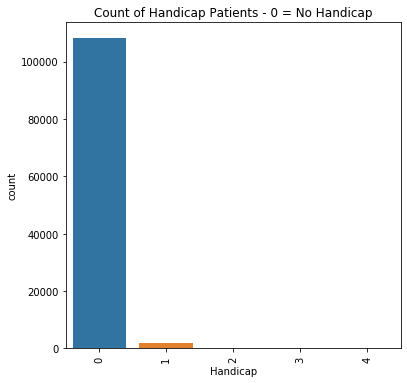

In [17]:
plt.figure(figsize=(6,6))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Handicap)
ax.set_title("Count of Handicap Patients - 0 = No Handicap")
plt.show()

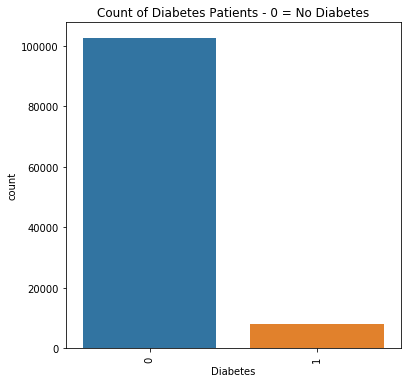

In [18]:
plt.figure(figsize=(6,6))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Diabetes)
ax.set_title("Count of Diabetes Patients - 0 = No Diabetes")
plt.show()

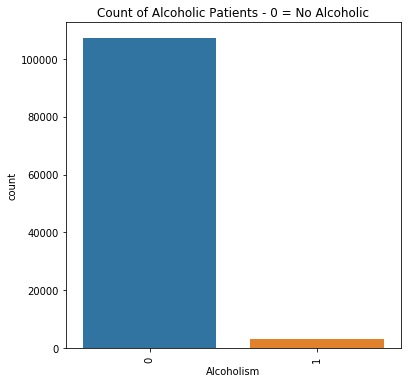

In [19]:
plt.figure(figsize=(6,6))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Alcoholism)
ax.set_title("Count of Alcoholic Patients - 0 = No Alcoholic")
plt.show()

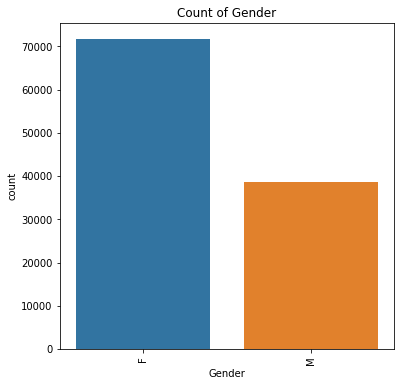

In [20]:
plt.figure(figsize=(6,6))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Gender)
ax.set_title("Count of Gender")
plt.show()

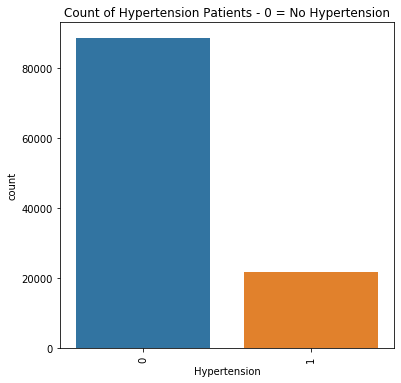

In [21]:
plt.figure(figsize=(6,6))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Hypertension)
ax.set_title("Count of Hypertension Patients - 0 = No Hypertension")
plt.show()

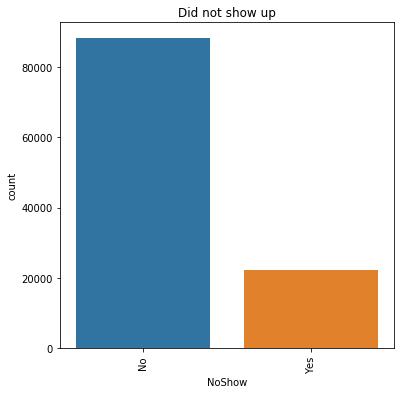

In [22]:
plt.figure(figsize=(6,6))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.NoShow)
ax.set_title("Did not show up")
plt.show()

<a id='eda'></a>
## Exploratory Data Analysis

Now that we've trimmed, cleaned and had a look at the data, we are ready to move on to exploration. 
We are now looking at statistics and create visualizations with the goal of addressing the research questions.

### Does gender affect the attendence to the appointments?

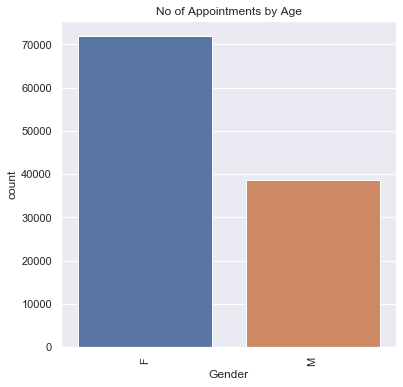

In [54]:
plt.figure(figsize=(6,6))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Gender)
ax.set_title("No of Appointments by Age")
plt.show()

In the above Chart we can see, that we got a lot more females than males in our dataset. 
Therefor we are calculating the propotion.

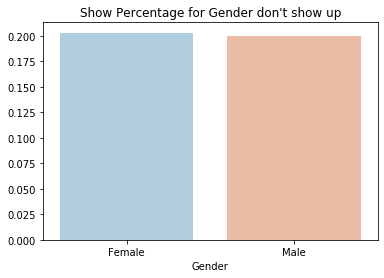

Gender
F    0.203149
M    0.199679
dtype: float64

In [25]:
df_s_ratio = df[df.NoShow == 'Yes'].groupby(['Gender']).size()/df.groupby(['Gender']).size()
ax = sns.barplot(x=df_s_ratio.index, y=df_s_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for Gender don't show up")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

df_s_ratio

We can conclude, that the gender has almost no, certainly no significant part in the fact, whether the patient shows up or not.

### Does the day of the appointment play a role in attending to the appointment?

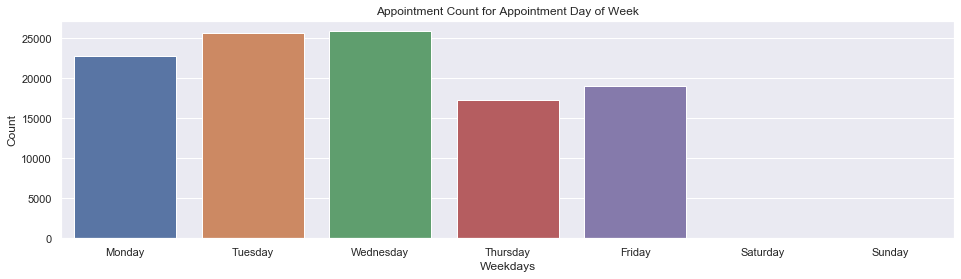

In [29]:
df['AppointmentDay_DOW'] = df['AppointmentDay'].dt.day_name()
week_key = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']


plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.AppointmentDay_DOW, order=week_key)
ax.set_title("Appointment Count for Appointment Day of Week")
ax.set(xlabel='Weekdays', ylabel='Count')
plt.show()

We can see, that Tuesday and Wednesday are the most common days of the week for appointments to be made, Thursday and Friday are significantly less appointments made. Saturday seems to have no appointments. Next, we will have a look if the day plays a role in the patient appearing to the appointment. 

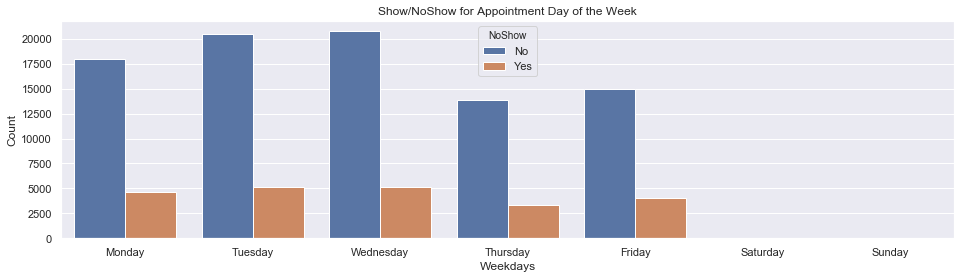

In [44]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.AppointmentDay_DOW, hue=df.NoShow, order=week_key)
ax.set_title("Show/NoShow for Appointment Day of the Week")
ax.set(xlabel='Weekdays', ylabel='Count')
plt.show()

Thanks to this bar chart, we got an indication, that people are most likely to turn up to the appointment on Tuesdays, Wednesdays and Thursdays. Monday and Friday indicate a slightly higher rate of no-shows. Which could be the case because its just before and after the weekend. Saturday again seems to play no role. But we are again looking at the proptions of the data.

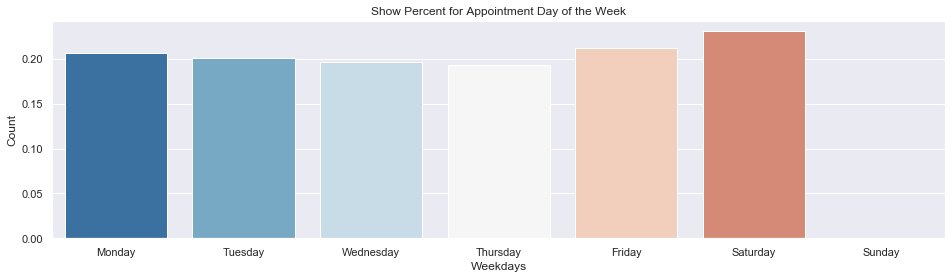

In [45]:
df_a_dow_ratio = df[df.NoShow == 'Yes'].groupby(['AppointmentDay_DOW']).size()/df.groupby(['AppointmentDay_DOW']).size()
plt.figure(figsize=(16,4))
ax = sns.barplot(x=df_a_dow_ratio.index, y=df_a_dow_ratio, order=week_key, palette="RdBu_r")
ax.set_title("Show Percent for Appointment Day of the Week")
ax.set(xlabel='Weekdays', ylabel='Count')
plt.show()

The proption of our data shows us, that Saturday did have apppointments and has the highest no show rate. Followed by Friday and Monday as previously assumed.
This gives us a good indication, that appointments around or during the weekend have a higher chance of patients not showing up.

### Is there a correlation between age and the attendence of appointments?

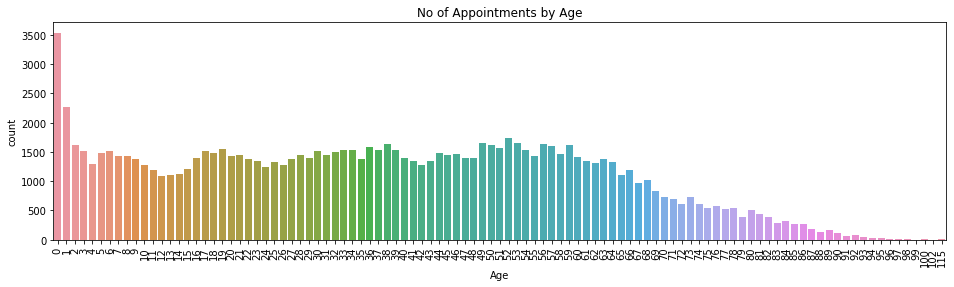

In [27]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age)
ax.set_title("No of Appointments by Age")
plt.show()

This chart shows us the distribution of age in our dataset. Surprisingly high numbers of patients aged 0. But generelly evenly distributed right screwed as pations get older than 60. Now we look at the propotions again.

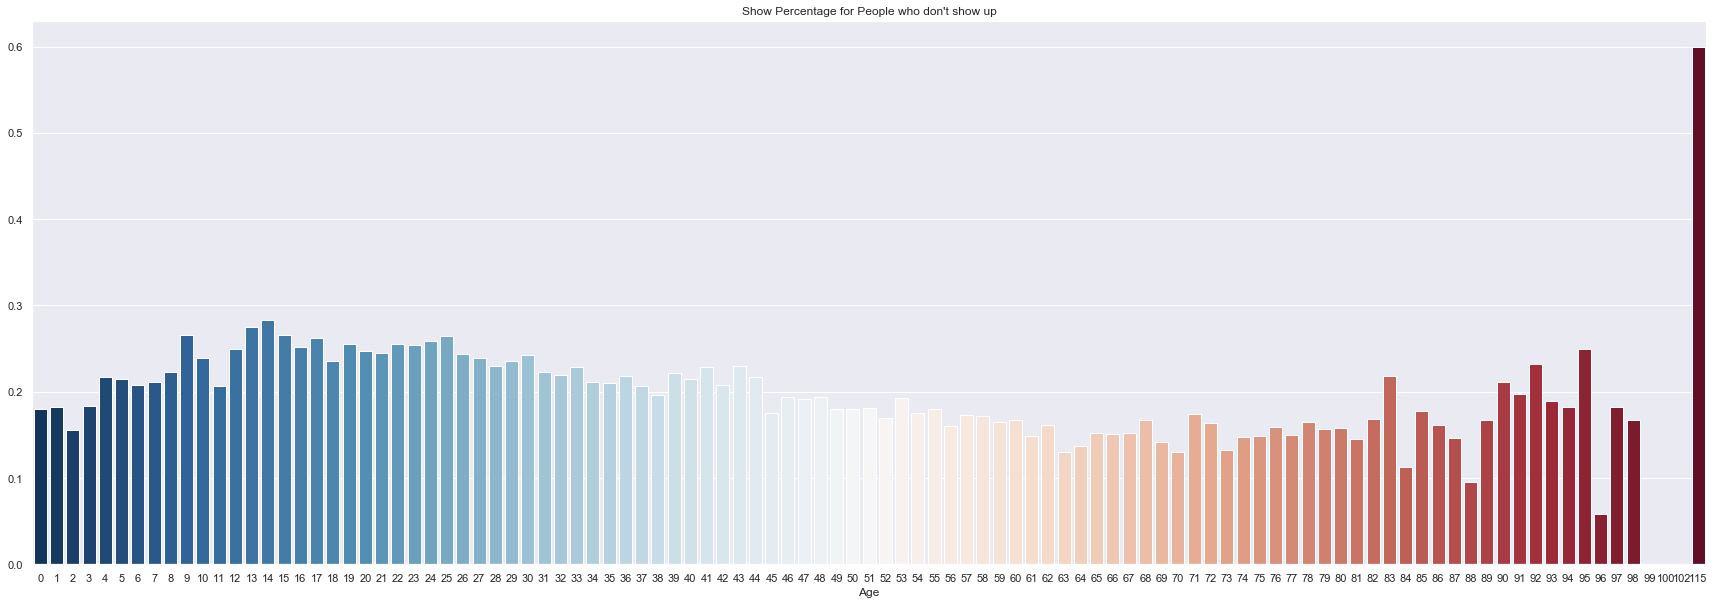

In [47]:
df_s_ratio = df[df.NoShow == 'Yes'].groupby(['Age']).size()/df.groupby(['Age']).size()
sns.set(rc={'figure.figsize':(30,10)})
ax = sns.barplot(x=df_s_ratio.index, y=df_s_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for People who don't show up")
plt.show()

There is a slight indication that younger patients (<50) are more likely to not show up than older ones (>50). A outlier is found for patients aged 115 who tend to not show up more than half of the time.

### Is there a correlation between having a scholarship and the attendence of appointments?

Scholarship  NoShow
0            No        79924
             Yes       19741
1            No         8283
             Yes        2578
Name: NoShow, dtype: int64

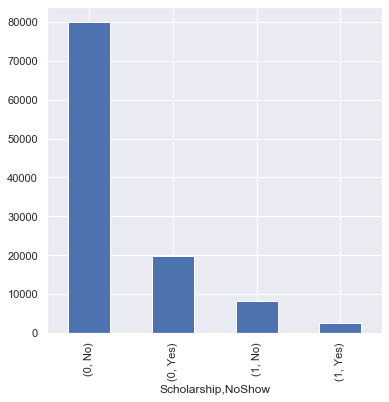

In [33]:
ss_noshow = df.groupby(["Scholarship", "NoShow"])["NoShow"].count()
ss_noshow.plot(kind="bar", figsize = (6,6));

ss_noshow

Above we can see the counts of patients who got a Scholarship and patients who dont and their counts of showing up or not.
It appears as if patients without a scholarship show up more.

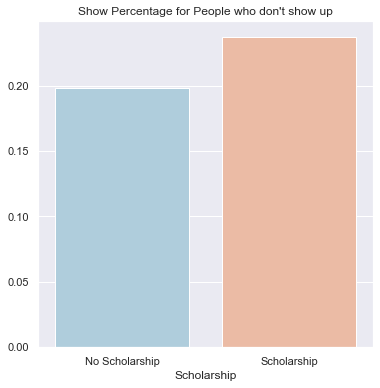

Scholarship
0    0.198074
1    0.237363
dtype: float64

In [32]:
df_s_ratio = df[df.NoShow == 'Yes'].groupby(['Scholarship']).size()/df.groupby(['Scholarship']).size()
sns.set(rc={'figure.figsize':(6,6)})
ax = sns.barplot(x=df_s_ratio.index, y=df_s_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for People who don't show up")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

df_s_ratio

In our proportions chart we can see a good indication that indeed patients with a scholarship show up less often than people without a scholarship.

### Is there a correlation between receiving an SMS and the attendence of appointments?

SMSReceived  NoShow
0            No        62509
             Yes       12535
1            No        25698
             Yes        9784
Name: NoShow, dtype: int64

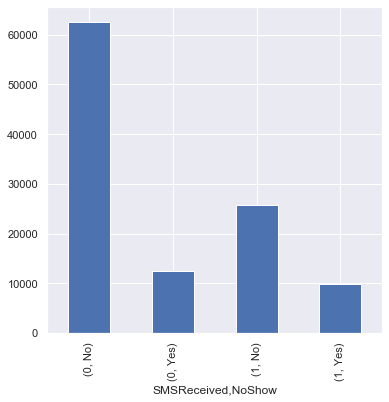

In [34]:
ss_noshow = df.groupby(["SMSReceived", "NoShow"])["NoShow"].count()
ss_noshow.plot(kind="bar", figsize = (6,6));

ss_noshow

Above we can see the counts of patients who received a SMS and patients who dont and their counts of showing up or not.
It appears as if patients who received a SMS show up less often.

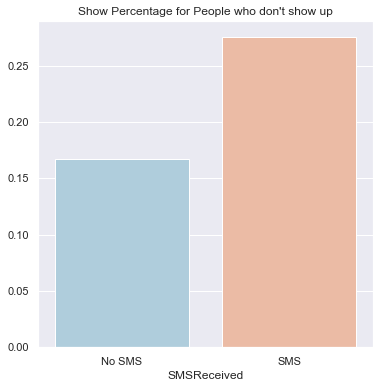

SMSReceived
0    0.167035
1    0.275745
dtype: float64

In [35]:
df_s_ratio = df[df.NoShow == 'Yes'].groupby(['SMSReceived']).size()/df.groupby(['SMSReceived']).size()
sns.set(rc={'figure.figsize':(6,6)})
ax = sns.barplot(x=df_s_ratio.index, y=df_s_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for People who don't show up")
x_ticks_labels=['No SMS', 'SMS']
ax.set_xticklabels(x_ticks_labels)
plt.show()

df_s_ratio

In our proportions chart we can see a good indication that indeed patients who received a SMS show up less often than people without a scholarship.

<a id='conclusions'></a>
## Conclusions

After looking at several data from patients making appointments in brazil, we have some indications but no strong evidence of any factor being part of patients not showing up.
1. Gender: No result, both gender appear / dont show up equally.
2. Day of the appointment: It appears that appointments on Monday, Friday and especially Saturday are more likely to be canceelled.
3. Age: Younger patients <30years are more likely to not show off than >30year old patients.
4. Scholarship: It appears that patients with a scholarship are more likely to cancel on appointments.
5. SMS Received: The strongest indication of patients not showing up is when they received an SMS prior to the appointment.
    
Concluding our analysis we faced some limitations, that prevent further analysis and maybe stronger indications of factors leading to patients not showing off.
We do not know, what the message of the SMS the patients received was. That could change the conclusion of the results drastically.
A first recommended action out of this analysis is, to try to set appointments to younger patients <30 on Tuesday, Wednesday or Thursday to limit no-shows.